# Introdução

In [1]:
import pandas as pd

In [2]:
co2 = pd.read_csv('co2.csv')
co2.head()

,data\tmedia
0,1980.042\t338.45
1,1980.125\t339.15
2,1980.208\t339.48
3,1980.292\t339.87
4,1980.375\t340.3


In [3]:
# o separador é \t
co2 = pd.read_csv('co2.csv', delimiter= '\t')
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [4]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

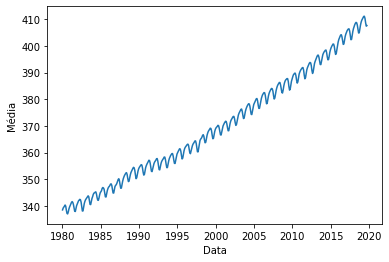

In [5]:
plt.plot(co2.data, co2.media)
plt.ylabel("Média")
plt.xlabel("Data")

In [6]:
nasc = pd.read_csv('nascimentos.csv')
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


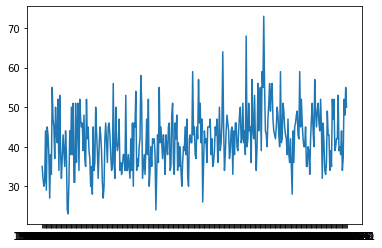

In [7]:
plt.plot(nasc.data, nasc.n_nasc)

### Além de modificar a coluna, temos que registrar a conversão

In [8]:
nasc.data = pd.to_datetime(nasc.data)

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0, 0.5, 'n nascimento')

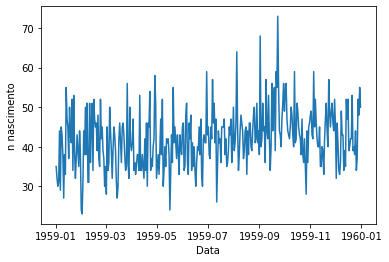

In [10]:
plt.plot(nasc.data, nasc.n_nasc)
plt.xlabel("Data")
plt.ylabel("n nascimento")

In [11]:
import numpy as np

In [12]:
media_carb = np.mean(co2['media'])
media_carb

370.1031446540881

In [13]:
co2.media.mean()

370.1031446540881

não entendi pq o professor preferiu usar o numpy para o claculo da média

In [14]:
#para pegar a distância entre os pontos de X
dt_carb = co2['data'][1] - co2['data'][0]
dt_carb

0.08300000000008367

In [15]:
#para pegar a posição do ultimo dado da séire
co2.iloc[-1, 0]

2019.708

Text(0.5, 0, 'Data')

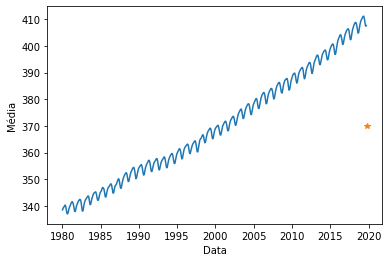

In [16]:
plt.plot(co2.data, co2.media)
plt.plot(co2.iloc[-1, 0] + dt_carb, media_carb, '*')
plt.ylabel("Média")
plt.xlabel("Data")

In [17]:
media_nasc = np.mean(nasc.n_nasc)
media_nasc

41.98082191780822

In [18]:
nasc.n_nasc.mean()

41.98082191780822

In [19]:
dt_nasc = nasc.data[1] - nasc.data[0]
dt_nasc

Timedelta('1 days 00:00:00')

Text(0, 0.5, 'n nascimento')

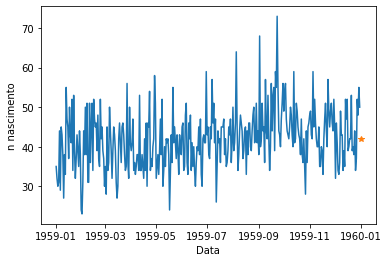

In [20]:
plt.plot(nasc.data, nasc.n_nasc)
plt.plot(nasc.iloc[-1, 0] + dt_nasc, media_nasc, '*')
plt.xlabel("Data")
plt.ylabel("n nascimento")

# Média móvel

In [21]:
# média móvel com os 5 últimos números
media_movel_co2 = co2.rolling(5).mean()
media_movel_co2

,data,media
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1980.2084,339.450
...,...,...
472,2019.2084,410.548
473,2019.2916,410.680
474,2019.3750,410.390
475,2019.4584,409.746


Text(0.5, 0, 'Data')

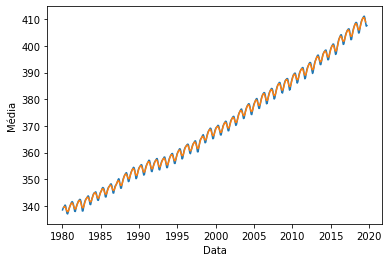

In [22]:
plt.plot(co2.data, co2.media)
plt.plot(media_movel_co2.data, media_movel_co2.media)
plt.ylabel("Média")
plt.xlabel("Data")

In [23]:
# média móvel com os 5 últimos números
media_movel_nasc = nasc.rolling(5).mean()
media_movel_nasc

,n_nasc
0,NaN
1,NaN
2,NaN
3,NaN
4,34.4
...,...
360,38.6
361,41.0
362,43.0
363,45.2


Text(0, 0.5, 'n nascimento')

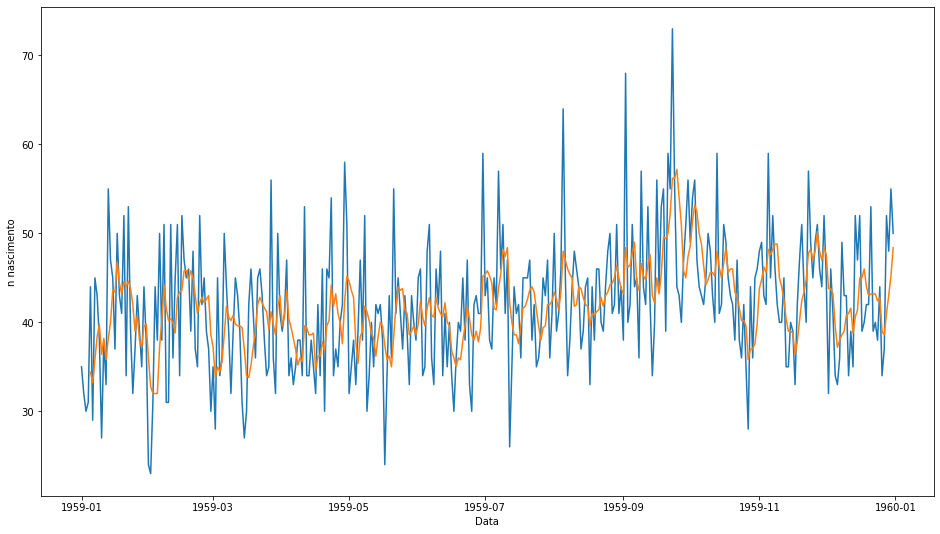

In [24]:
plt.figure(figsize=(16,9))
plt.plot(nasc.data, nasc.n_nasc)
plt.plot(nasc.data, media_movel_nasc.n_nasc)
plt.xlabel("Data")
plt.ylabel("n nascimento")

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
result_co2 = seasonal_decompose(co2.set_index('data'), period= 35)

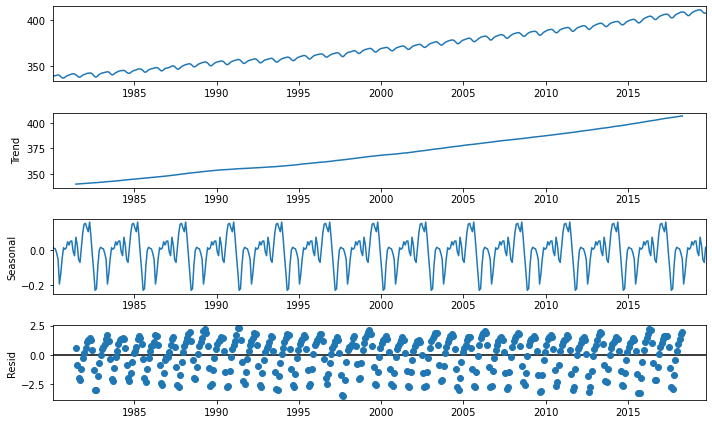

In [27]:
plt.rcParams['figure.figsize'] = (10,6)
result_co2.plot();

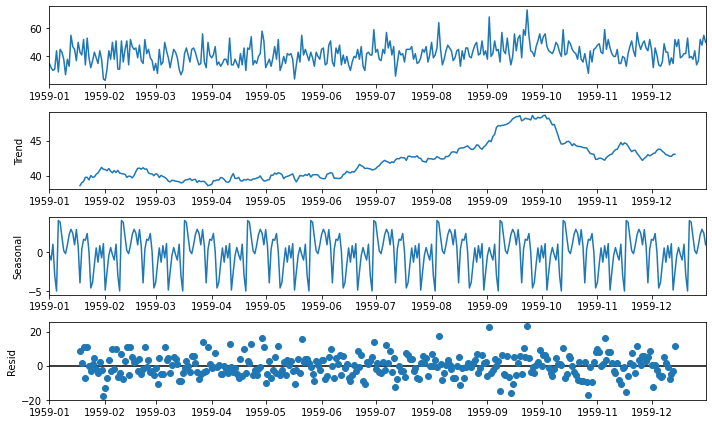

In [28]:
result_nasc = seasonal_decompose(nasc.set_index('data'), period= 35)
result_nasc.plot();

# Estacionariedade

<AxesSubplot:>

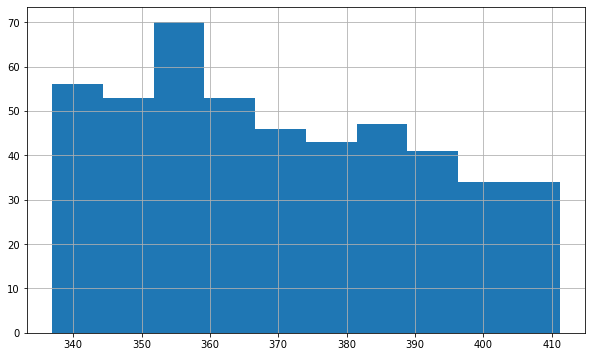

In [29]:
co2.media.hist()

A Estacionariedade é quando a distribuição se comporta como uma normal

In [30]:
x = co2.media.values
divide = int(len(co2) / 2)

In [31]:
c1, c2 = x[:divide], x[divide:]
display(c1.mean(), c2.mean())

352.31550420168065

387.816359832636

In [32]:
display(c1.var(), c2.var())

73.90219533401597

151.542490933282

* Podemos observar com essas medidas a não estacionariedade, por conta da grande diferença entre as metades |^

In [33]:
x = nasc.n_nasc.values
divide = int(len(nasc) / 2)
n1, n2 = x[:divide], x[divide:]
display(n1.mean(), n2.mean())

39.76373626373626

44.185792349726775

In [34]:
display(n1.var(), n2.var())

49.21341021615746

48.708650601690096

aparentemente essa distribuição de dados é estacionário (aproximadamente)

<AxesSubplot:>

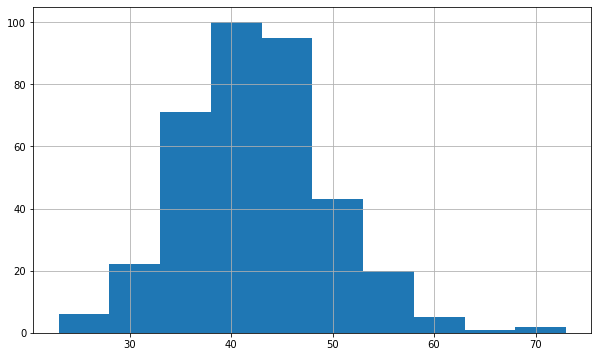

In [35]:
nasc.n_nasc.hist()
#comprvando para ver se a distribuição é normal

# teste ADF para comprovar a estacionariedade

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
resultado_co2 = adfuller(co2.media.values)
resultado_co2

(3.036828829166984,
 1.0,
 18,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 -572.1328605372778)

In [38]:
print('Estatística ADF: ', resultado_co2[0])
# estacionario o número é próximo a zero

Estatística ADF:  3.036828829166984


In [39]:
print('O p-valor é ', resultado_co2[1])

O p-valor é  1.0


---

In [40]:
resultado_nasc = adfuller(nasc.n_nasc.values)
resultado_nasc

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [41]:
print('Estatística ADF: ', resultado_nasc[0])
print('O p-valor é ', resultado_nasc[1])

Estatística ADF:  -4.808291253559765
O p-valor é  5.2434129901498554e-05


O resultado acima comprova o teste que a série é estacionária

# Suavização exponencial

In [42]:
co2 = co2.set_index('data')
co2

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2019.375,411.16
2019.458,410.35
2019.542,408.69


In [43]:
co2_treino = co2[1980.042:2015]
co2_teste = co2[2015 : ]

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [45]:
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level=0.5)

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [46]:
co2_teste.shape

(57, 1)

In [47]:
modelo_previsto = modelo_ajustado.forecast(57)

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


### Agora vamos ver o resultado da previsão

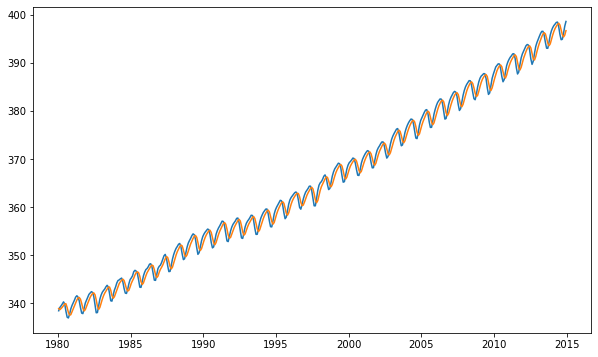

In [48]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)

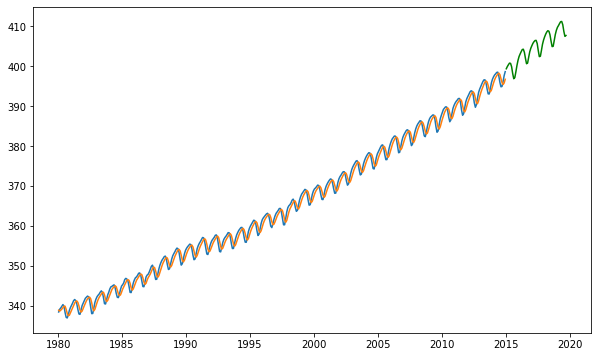

In [49]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste, 'g')

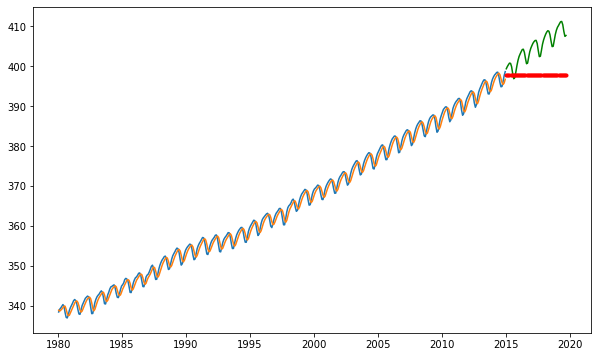

In [50]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

---

In [51]:
nasc = nasc.set_index('data')
nasc_treino = nasc['1959-01-01':'1959-12-01']
nasc_teste = nasc['1959-12-01':]

In [52]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5)

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [53]:
nasc_teste.shape[0]

31

In [54]:
modelo_previsto = modelo_ajustado.forecast(31)

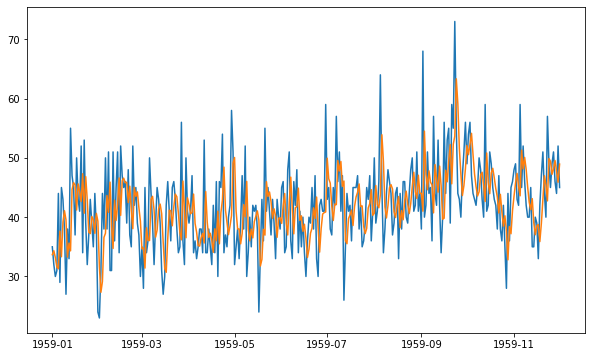

In [55]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)

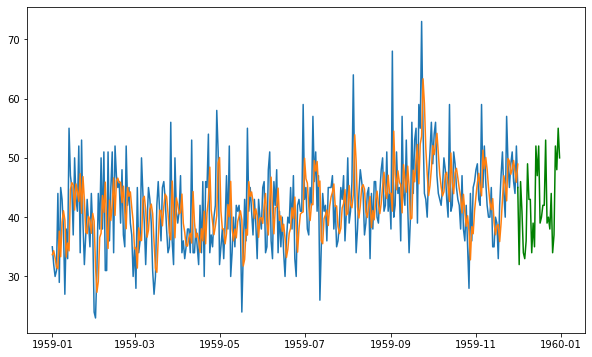

In [56]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste, 'g')

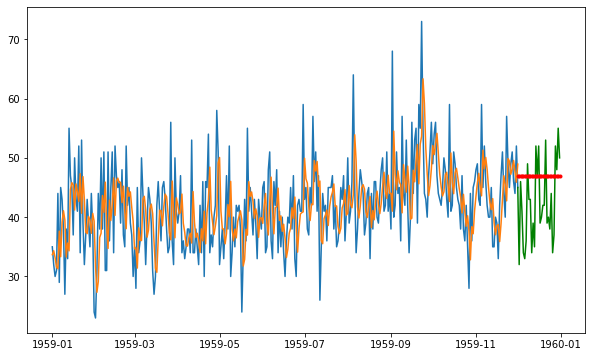

In [57]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r.')

---

# HoltWinters
## Suavização de 3ª ordem

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
modelo_ajustado = ExponentialSmoothing(co2_treino.values, trend='additive', seasonal='additive', seasonal_periods=35).fit()

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [60]:
co2.shape

(477, 1)

In [61]:
co2_teste.shape

(57, 1)

In [62]:
modelo_previsto = modelo_ajustado.predict(start=420, end=476)

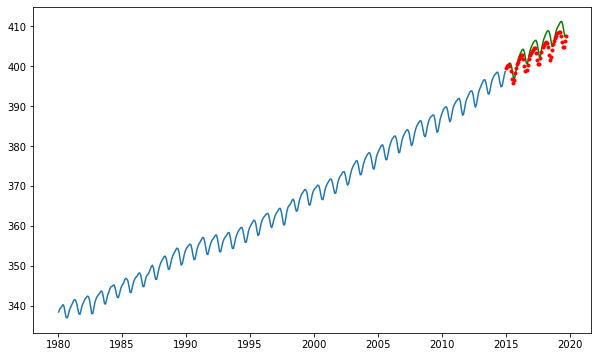

In [63]:
plt.figure(figsize=(10,6))
plt.plot(co2_treino)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [64]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend='multiplicative', seasonal=None).fit()

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [65]:
nasc.shape

(365, 1)

In [66]:
nasc_teste.shape

(31, 1)

In [67]:
modelo_previsto = modelo_ajustado.predict(start=335, end=365)

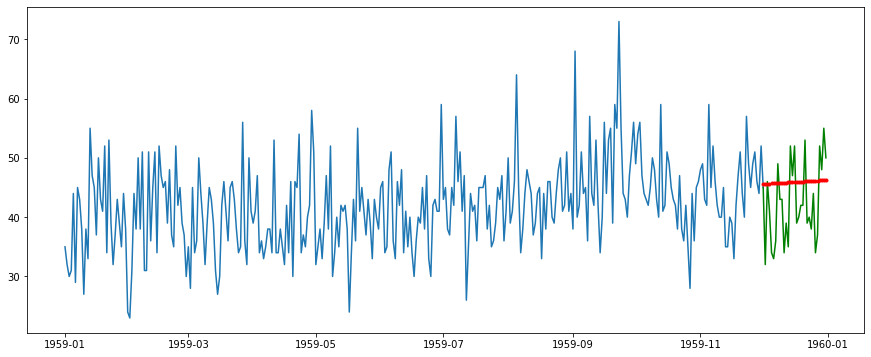

In [68]:
plt.figure(figsize = (15,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r.')

### Como não colocamos sazonalidade, a suavização ficou uma reta, levemente crescente

In [69]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend='multiplicative', 
                                       seasonal='multiplicative', seasonal_periods=58).fit()
modelo_previsto_suave = modelo_ajustado.predict(start=334, end=364)

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


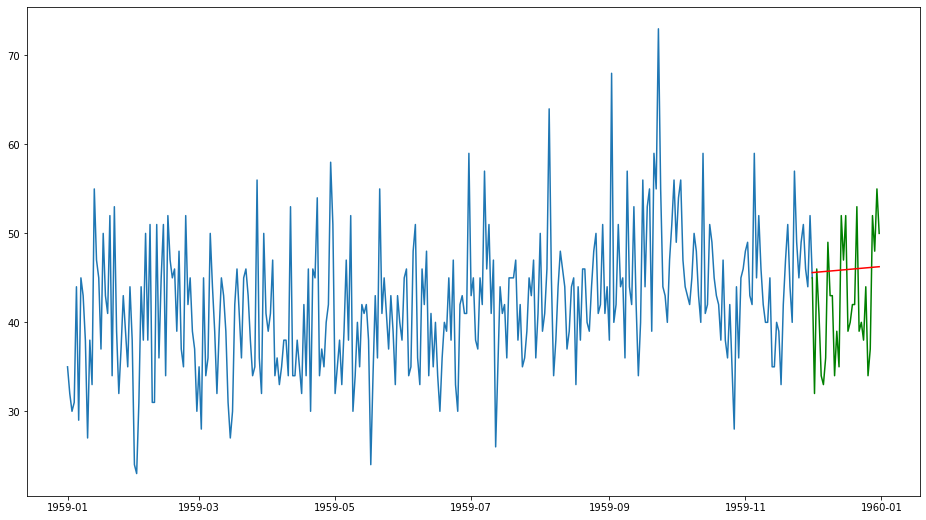

In [70]:
plt.figure(figsize=(16,9))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r')

# Autocorrelação

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

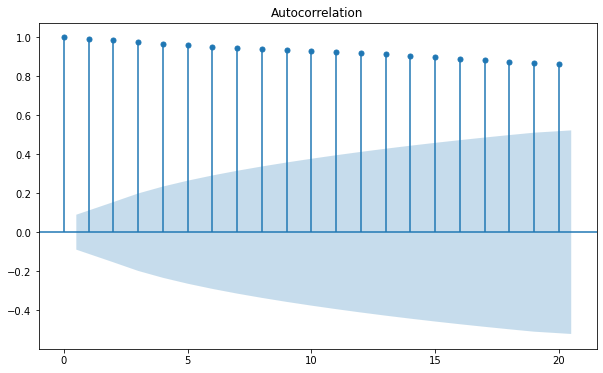

In [72]:
plot_acf(co2['media'], lags=20); # o ; é para evitar o gráfico duplicado

**A série possui sazonalidade.<br>
Os valores mais altos da autocorrelação indicam que existem partes semelhantes na série temporal por diversos atrasos.**

# Autocorrelação parcial

In [73]:
from statsmodels.graphics.tsaplots import plot_pacf

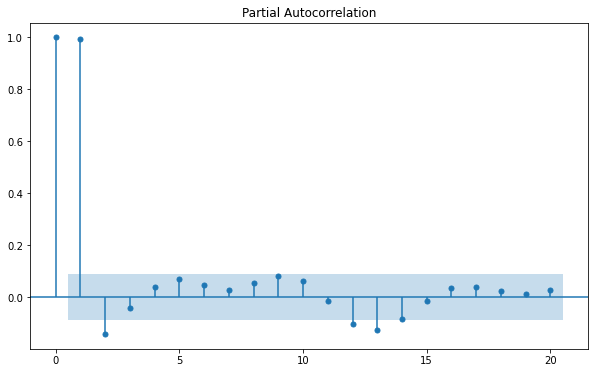

In [74]:
plot_pacf(co2['media'], lags=20);

---

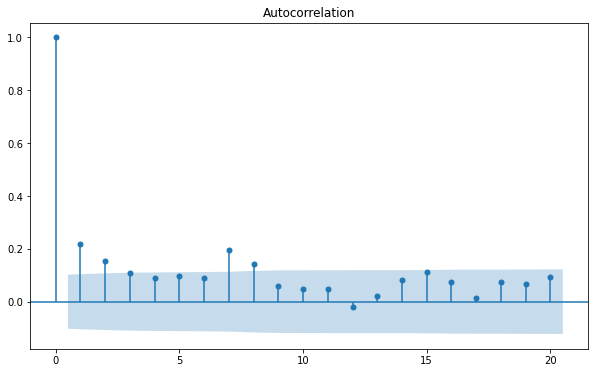

In [75]:
plot_acf(nasc['n_nasc'], lags=20);

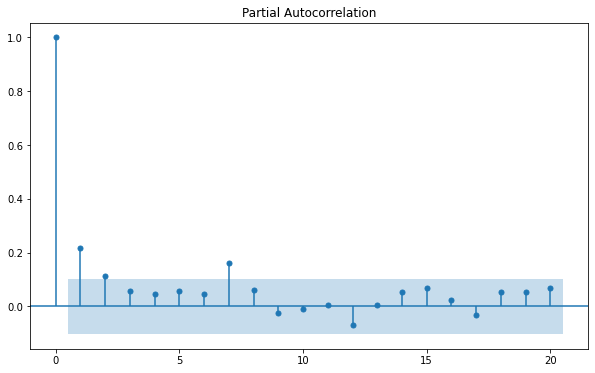

In [76]:
plot_pacf(nasc['n_nasc'], lags=20);

# Modelos Autoregressivos

In [77]:
from statsmodels.tsa.ar_model import AutoReg

In [78]:
lista = np.linspace(1,40,40)
lista

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

In [79]:
modelo_ajustado = AutoReg(co2_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [80]:
modelo_previsto = modelo_ajustado.predict(start=420, end=476)

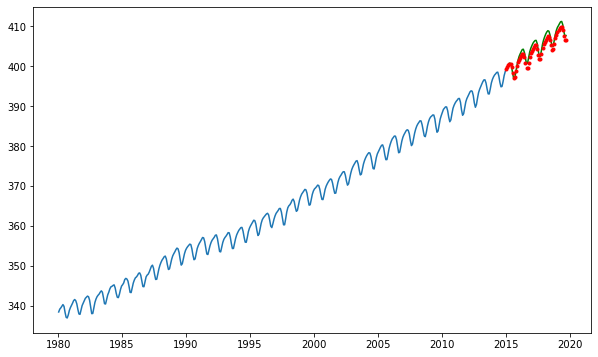

In [81]:
plt.plot(co2_treino)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [82]:
modelo_ajustado = AutoReg(nasc_treino.values, lags = lista, trend='c',seasonal=True,period=35).fit()

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [83]:
modelo_previsto_ar = modelo_ajustado.predict(start=335,end=365)

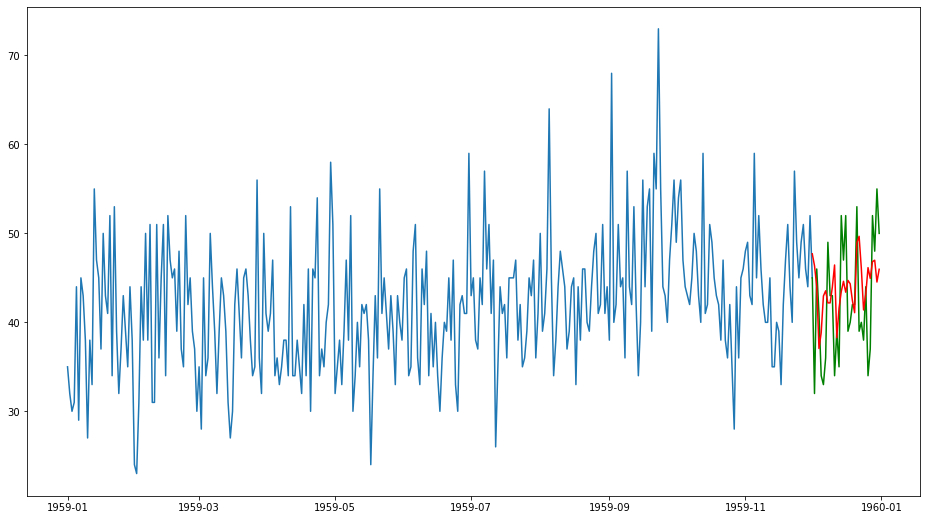

In [84]:
plt.figure(figsize=(16,9))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r')

# Medidas de performance

## medidas de erro

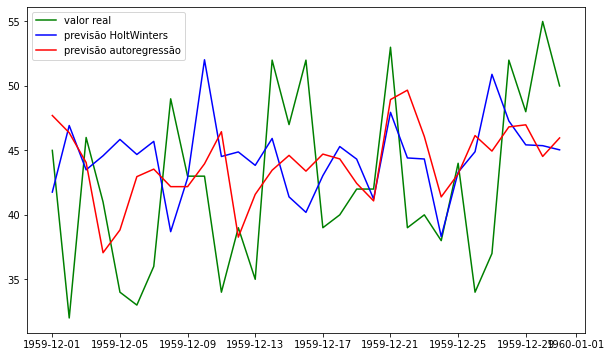

In [85]:
plt.plot(nasc_teste,'g', label='valor real')
plt.plot(nasc_teste.index,modelo_previsto_suave,'b-', label='previsão HoltWinters')
plt.plot(nasc_teste.index,modelo_previsto_ar,'r', label='previsão autoregressão')
plt.legend()

In [86]:
Erro_prev_s = nasc_teste['n_nasc'] - modelo_previsto_suave
Erro_prev = nasc_teste['n_nasc'] - modelo_previsto_ar

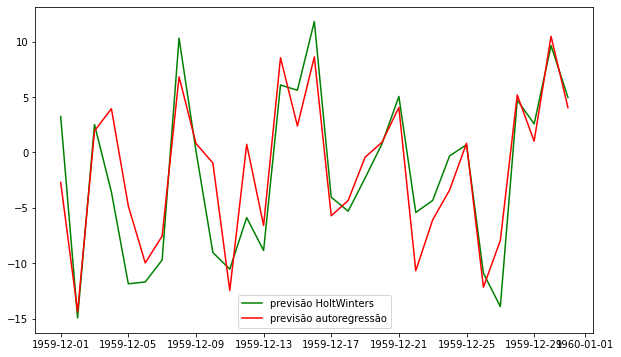

In [87]:
plt.plot(Erro_prev_s,'g',label='previsão HoltWinters')
plt.plot(Erro_prev,'r',label='previsão autoregressão')
plt.legend()
plt.show()

### Erro de previsão médio

In [88]:
np.mean(Erro_prev_s)

-2.0788347717501563

In [89]:
np.mean(Erro_prev)

-1.6083080804503544

### Erro absoluto médio

In [90]:
np.mean(np.abs(Erro_prev_s))

6.471500897090883

In [91]:
np.mean(np.abs(Erro_prev))

5.4967205480921075

In [92]:
from sklearn.metrics import mean_absolute_error

In [93]:
mae = mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_ar)
mae

5.496720548092109

### Erro médio quadrático da raiz

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_suave)

58.875003664636495

In [96]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar)

45.43739422181419